Arquivo de treinamento e testes de imóveis carregado com sucesso!
Número de imóveis sem informações da quantidade de banheiros: 144
Número de imóveis sem informações da quantidade de dormitórios: 8
Número de imóveis sem informações da quantidade de garagens: 132
Gráfico dos registros com dados que faltavam


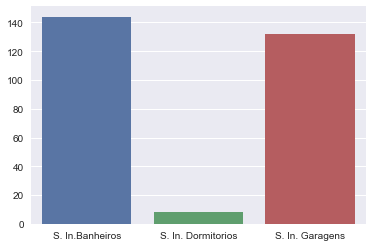

In [47]:
#Importação das bibliotecas para leitura do arquivo csv, classes para divisão em treinamento e testes, 
#algoritmos DecisionTreeClassifier e svm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

%matplotlib inline

#Leitura do arquivo para treinamento e testes. Este é o arquivo que foi modificado e que possui uma coluna booleana 
#bomIvestimento que foi definida com a ajuda de um especialista na área imobiliária
try:
    data = pd.read_csv("imoveis-treinamento-testes.csv", sep=";", encoding="utf8")
    print "Arquivo de treinamento e testes de imóveis carregado com sucesso!"
except:
    print "Dataset não pode ser carregado!"

    
#Troca 0.0 para False e 1.0 para True na coluna bomIvestimento
data['bomInvestimento'] = data['bomInvestimento'].map({0.0: False, 1.0: True}) 

#Remove imóveis com preço sob consulta
data = data.drop(data[data.valor == "Sob consulta"].index)

#Remove imóveis sem informação da metragem
data = data.drop(data[data.metragem.isnull()].index)

imoveisSemInfoBanheiro =  data[data.banheiros.isnull() == True].shape[0]
print "Número de imóveis sem informações da quantidade de banheiros: " + str(imoveisSemInfoBanheiro)

imoveisSemInfoDormitorios =  data[data.dormitorios.isnull() == True].shape[0]
print "Número de imóveis sem informações da quantidade de dormitórios: " + str(imoveisSemInfoDormitorios)

imoveisSemInfoGaragem =  data[data.vagasGaragem.isnull() == True].shape[0]
print "Número de imóveis sem informações da quantidade de garagens: " + str(imoveisSemInfoGaragem)

print "Gráfico dos registros com dados que faltavam"
labels = ['S. In.Banheiros', 'S. In. Dormitorios', 'S. In. Garagens']
values = [imoveisSemInfoBanheiro, imoveisSemInfoDormitorios, imoveisSemInfoGaragem]
sns.barplot(x=labels, y=values);


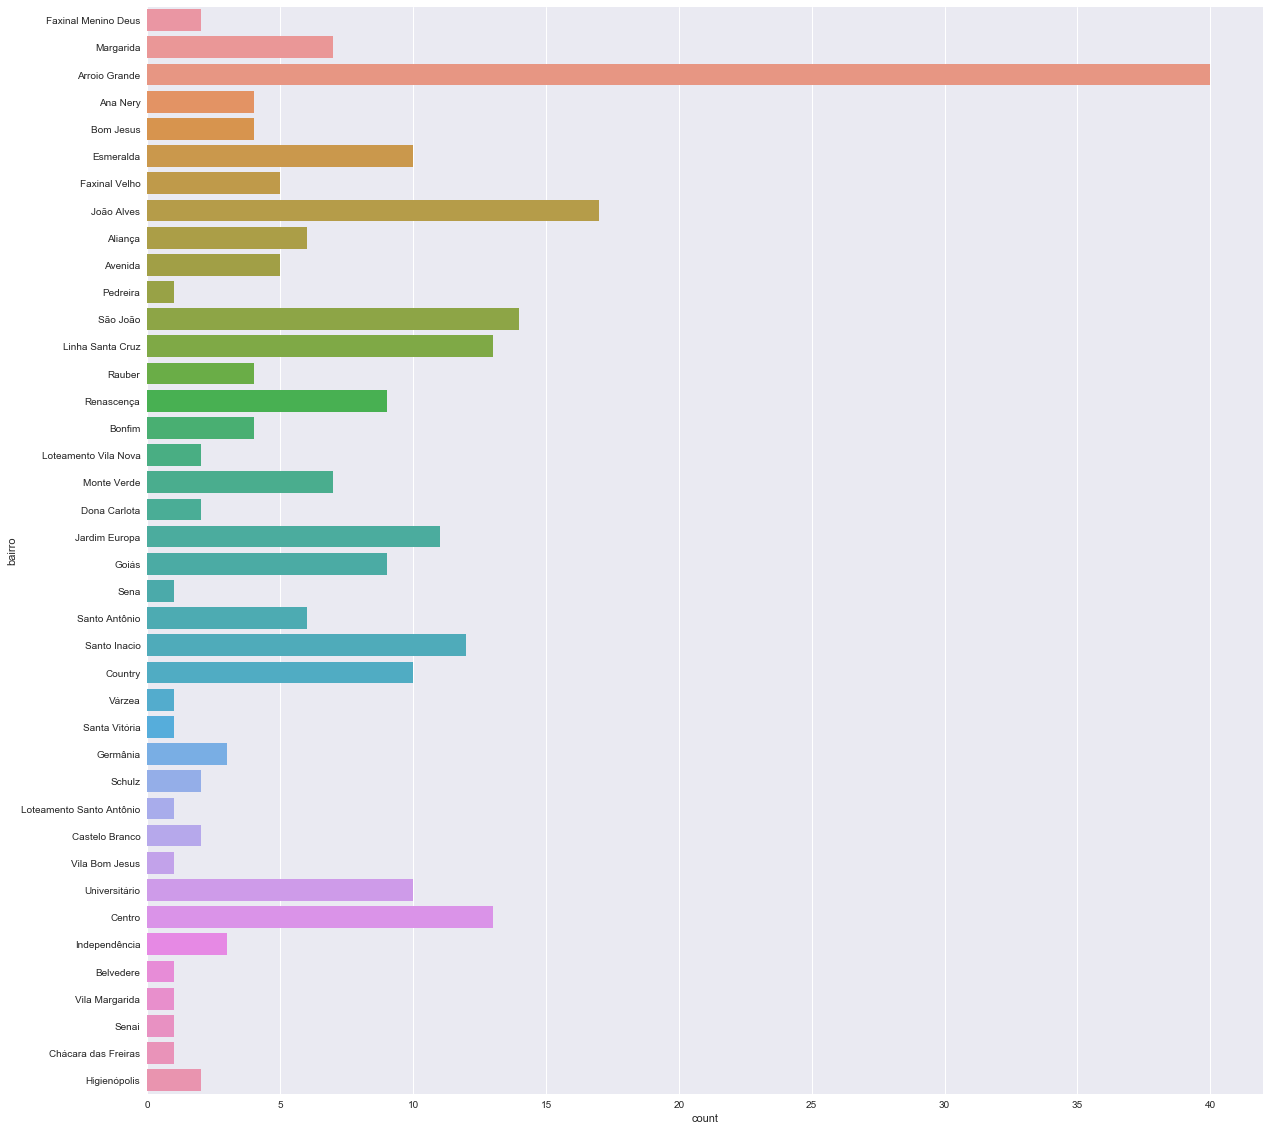

In [48]:
plt.figure(figsize=(20,20)) 
sns.countplot(y="bairro",  data=data);
plt.show()

In [49]:
#Preenche valores padrões para coluna de banheiros, vagas na garagem, dormitórios
#E metragem da casa
data['banheiros'] = data['banheiros'].fillna(1)
data['vagasGaragem'] = data['vagasGaragem'].fillna(0)
data['dormitorios'] = data['dormitorios'].fillna(1)
data['metragem'] = data['metragem'].fillna(0)

data['valor'] = data['valor'].apply(pd.to_numeric)
#Mostro os tipos de dados de cada coluna para saber se a conversão foi feita corretamente
print data.dtypes

#Mostro algumas estatísticas do dataset
display(data.describe())


valor              float64
bairro              object
obs                 object
tipo                object
dormitorios        float64
banheiros          float64
vagasGaragem       float64
metragem           float64
codigo              object
bomInvestimento       bool
dtype: object


,valor,dormitorios,banheiros,vagasGaragem,metragem
count,2.480000e+02,248.000000,248.0,248.000000,248.000000
mean,3.628478e+05,2.649194,1.0,0.467742,143.778669
std,4.886955e+05,0.909865,0.0,0.499967,111.616925
min,8.000000e+04,1.000000,1.0,0.000000,31.000000
25%,1.600000e+05,2.000000,1.0,0.000000,74.870000
50%,2.510000e+05,3.000000,1.0,0.000000,114.970000
75%,4.270000e+05,3.000000,1.0,1.000000,182.750000
max,7.000000e+06,10.000000,1.0,1.000000,1300.000000


In [50]:
#Outras estatísticas sobre o conteúdo do dataset
print "Bons investimentos: " + str(len(data[data.bomInvestimento]))
print "Maus investimentos: " + str(len(data[data.bomInvestimento == False]))
print "Tamanho médio das casas com bom investimento: " + str(data[data.bomInvestimento].metragem.mean())
print "Tamanho médio das casas mal investimento: " + str(data[data.bomInvestimento == False].metragem.mean())
print "Número médio de dormitórios bom investimento: " + str(data[data.bomInvestimento].dormitorios.mean())
print "Número médio de dormitórios mal investimento: " + str(data[data.bomInvestimento == False].dormitorios.mean())


Bons investimentos: 17
Maus investimentos: 231
Tamanho médio das casas com bom investimento: 261.931176471
Tamanho médio das casas mal investimento: 135.083463203
Número médio de dormitórios bom investimento: 2.88235294118
Número médio de dormitórios mal investimento: 2.63203463203


Distribuição dos imóveis pela sua metragem


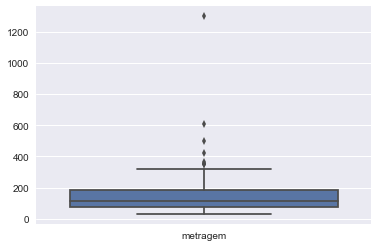

In [51]:
print "Distribuição dos imóveis pela sua metragem"
data_copy = data.drop(['valor','banheiros', 'vagasGaragem', 'dormitorios','bomInvestimento', 'codigo', 'bairro', 'obs', 'tipo'], axis = 1)
sns.boxplot(data=data_copy)

Removendo imóveis com metragem acima de 600, para melhor visualização


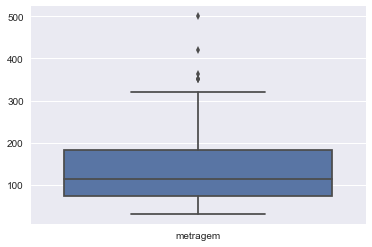

In [52]:
print "Removendo imóveis com metragem acima de 600, para melhor visualização"
data_copy = data.drop(['valor','banheiros', 'vagasGaragem', 'dormitorios','bomInvestimento', 'codigo', 'bairro', 'obs', 'tipo'], axis = 1)
data_copy = data_copy.drop(data_copy[data_copy.metragem > 600].index)
sns.boxplot(data=data_copy)

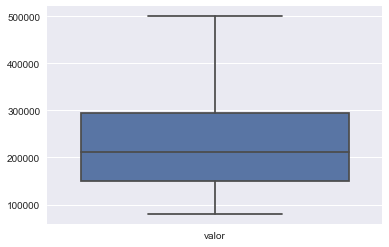

In [53]:
d1 = data.drop(['metragem','banheiros', 'vagasGaragem', 'dormitorios','bomInvestimento', 'codigo', 'bairro', 'obs', 'tipo'], axis = 1)
d1 = d1.drop(d1[d1.valor > 500000].index)
sns.boxplot(data=d1)

In [56]:
# Fiz uma cópia do dataframe original removendo colunas não usadas para o fim de treinamento e testes
new_data = data.drop(['bomInvestimento', 'codigo', 'obs', 'tipo'], axis = 1)

#Divisão do dataset para fins de treinamento e testes
X_train, X_test, y_train, y_test = train_test_split(new_data, data['bomInvestimento'], test_size=0.30, random_state=158)

#Aplicando o algoritmo DecisionTreeClassifier e exibindo o score
dt = DecisionTreeClassifier(random_state=160)
dt.fit(X_train, y_train)
print "Score usando algoritmo DecisionTreeClassifier: " + str(dt.score(X_test, y_test))

aSvm = svm.SVC(random_state=160)
aSvm.fit(X_train, y_train)
print "Score usando algoritmo SVC: " + str(aSvm.score(X_test, y_test))

ValueError: could not convert string to float: Santo Inacio

In [55]:
#Usando GridSearchCV para encontrar parâmetros melhores para os algoritmos de classificação
parametersDT = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,10],
    'min_samples_split': [2,3,4]
}
regressorDT = DecisionTreeClassifier(random_state=158)
clf2 = GridSearchCV(regressorDT, parametersDT, n_jobs=2)
clf2.fit(X_train, y_train)
score = clf2.best_estimator_.score(X_test, y_test)
print "Score do algoritmo DecisionTreeClassifier com GridSearchCV: " + str(score)
print "Melhores parâmetros encontrados para DecisionTreeClassifier"
print clf2.best_params_


parametersSVC = {
    'C': [0.01, 0.1, 0.5, 1] , 
    'kernel': ['sigmoid', 'rbf'],
    'gamma': [ 0.001, 0.01, 0.1, 0.5]
}
regressorSVC = svm.SVC(random_state=158)
clf1 = GridSearchCV(regressorSVC, parametersSVC, n_jobs=2)
clf1.fit(X_train, y_train)
# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
score = clf1.best_estimator_.score(X_test, y_test)
print "Score do algoritmo SVC com GridSearchCV: " + str(score)
print "Melhores parâmetros encontrados para SVC"
print clf1.best_params_



JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/usr/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x7fdddcd128b0, file "/...2.7/dist-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x7fdddcd128b0, file "/...2.7/dist-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py in <module>()
      1 if __name__ == '__main__':
      2     from ipykernel import kernelapp as app
----> 3     app.launch_new_instance()

...........................................................................
/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': u'#Usando GridSearchCV para encontrar par\xe2met...contrados para SVC"\nprint clf1.best_params_\n\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-11-17T23:05:04.775801', 'msg_id': '7F02584F17FB487AA596E1E32B34EDA8', 'msg_type': 'execute_request', 'session': '6CD4A3251151474C9486FDC970B0C30F', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '7F02584F17FB487AA596E1E32B34EDA8', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['6CD4A3251151474C9486FDC970B0C30F']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': u'#Usando GridSearchCV para encontrar par\xe2met...contrados para SVC"\nprint clf1.best_params_\n\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-11-17T23:05:04.775801', 'msg_id': '7F02584F17FB487AA596E1E32B34EDA8', 'msg_type': 'execute_request', 'session': '6CD4A3251151474C9486FDC970B0C30F', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '7F02584F17FB487AA596E1E32B34EDA8', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['6CD4A3251151474C9486FDC970B0C30F'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': u'#Usando GridSearchCV para encontrar par\xe2met...contrados para SVC"\nprint clf1.best_params_\n\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2017-11-17T23:05:04.775801', 'msg_id': '7F02584F17FB487AA596E1E32B34EDA8', 'msg_type': 'execute_request', 'session': '6CD4A3251151474C9486FDC970B0C30F', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '7F02584F17FB487AA596E1E32B34EDA8', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'#Usando GridSearchCV para encontrar par\xe2met...contrados para SVC"\nprint clf1.best_params_\n\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'#Usando GridSearchCV para encontrar par\xe2met...contrados para SVC"\nprint clf1.best_params_\n\n'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'#Usando GridSearchCV para encontrar par\xe2met...contrados para SVC"\nprint clf1.best_params_\n\n',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'#Usando GridSearchCV para encontrar par\xe2met...contrados para SVC"\nprint clf1.best_params_\n\n',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'#Usando GridSearchCV para encontrar par\xe2met...contrados para SVC"\nprint clf1.best_params_\n\n', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Print object>, <_ast.Print object>, <_ast.Print object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Print object>, <_ast.Print object>, <_ast.Print object>], cell_name='<ipython-input-55-c11bc4a1ae91>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 7fdd9a82fe50, executi..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fdd9a24f730, file "<ipython-input-55-c11bc4a1ae91>", line 10>
        result = <ExecutionResult object at 7fdd9a82fe50, executi..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fdd9a24f730, file "<ipython-input-55-c11bc4a1ae91>", line 10>, result=<ExecutionResult object at 7fdd9a82fe50, executi..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fdd9a24f730, file "<ipython-input-55-c11bc4a1ae91>", line 10>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Importa\xe7\xe3o das bibliotecas para leitura...emInfoGaragem]\nsns.barplot(x=labels, y=values);', u'plt.figure(figsize=(20,20)) \nsns.countplot(y="bairro",  data=data);\nplt.show()', u"#Preenche valores padr\xf5es para coluna de ba...t\xedsticas do dataset\ndisplay(data.describe())", u'#Outras estat\xedsticas sobre o conte\xfado do...ta.bomInvestimento == False].dormitorios.mean())', u'print "Distribui\xe7\xe3o dos im\xf3veis pela ...'tipo\'], axis = 1)\nsns.boxplot(data=data_copy)', u'print "Removendo im\xf3veis com metragem acima...ragem > 600].index)\nsns.boxplot(data=data_copy)', u"d1 = data.drop(['metragem','banheiros', 'vagas...[d1.valor > 500000].index)\nsns.boxplot(data=d1)", u'# Fiz uma c\xf3pia do dataframe original remov...goritmo SVC: " + str(aSvm.score(X_test, y_test))', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'# Fiz uma c\xf3pia do dataframe original remov...goritmo SVC: " + str(aSvm.score(X_test, y_test))', u'#Importa\xe7\xe3o das bibliotecas para leitura...emInfoGaragem]\nsns.barplot(x=labels, y=values);', u'plt.figure(figsize=(20,20)) \nsns.countplot(y="bairro",  data=data);\nplt.show()', u"#Preenche valores padr\xf5es para coluna de ba...t\xedsticas do dataset\ndisplay(data.describe())", ...], 'Out': {6: <matplotlib.axes._subplots.AxesSubplot object>, 7: <matplotlib.axes._subplots.AxesSubplot object>, 8: <matplotlib.axes._subplots.AxesSubplot object>, 21: <matplotlib.axes._subplots.AxesSubplot object>, 22: <matplotlib.axes._subplots.AxesSubplot object>, 23: <matplotlib.axes._subplots.AxesSubplot object>, 30: <matplotlib.axes._subplots.AxesSubplot object>, 31: <matplotlib.axes._subplots.AxesSubplot object>, 32: <matplotlib.axes._subplots.AxesSubplot object>, 39: <matplotlib.axes._subplots.AxesSubplot object>, ...}, 'X_test':          valor                bairro  dormitorio...  198.00  
70      70.00  

[75 rows x 6 columns], 'X_train':          valor               bairro  dormitorios... 230.00  
159     97.50  

[173 rows x 6 columns], '_': <matplotlib.axes._subplots.AxesSubplot object>, '_21': <matplotlib.axes._subplots.AxesSubplot object>, '_22': <matplotlib.axes._subplots.AxesSubplot object>, '_23': <matplotlib.axes._subplots.AxesSubplot object>, ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Importa\xe7\xe3o das bibliotecas para leitura...emInfoGaragem]\nsns.barplot(x=labels, y=values);', u'plt.figure(figsize=(20,20)) \nsns.countplot(y="bairro",  data=data);\nplt.show()', u"#Preenche valores padr\xf5es para coluna de ba...t\xedsticas do dataset\ndisplay(data.describe())", u'#Outras estat\xedsticas sobre o conte\xfado do...ta.bomInvestimento == False].dormitorios.mean())', u'print "Distribui\xe7\xe3o dos im\xf3veis pela ...'tipo\'], axis = 1)\nsns.boxplot(data=data_copy)', u'print "Removendo im\xf3veis com metragem acima...ragem > 600].index)\nsns.boxplot(data=data_copy)', u"d1 = data.drop(['metragem','banheiros', 'vagas...[d1.valor > 500000].index)\nsns.boxplot(data=d1)", u'# Fiz uma c\xf3pia do dataframe original remov...goritmo SVC: " + str(aSvm.score(X_test, y_test))', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'#Usando GridSearchCV para encontrar par\xe2met...s encontrados para SVC"\nprint clf1.best_params_', u'# Fiz uma c\xf3pia do dataframe original remov...goritmo SVC: " + str(aSvm.score(X_test, y_test))', u'#Importa\xe7\xe3o das bibliotecas para leitura...emInfoGaragem]\nsns.barplot(x=labels, y=values);', u'plt.figure(figsize=(20,20)) \nsns.countplot(y="bairro",  data=data);\nplt.show()', u"#Preenche valores padr\xf5es para coluna de ba...t\xedsticas do dataset\ndisplay(data.describe())", ...], 'Out': {6: <matplotlib.axes._subplots.AxesSubplot object>, 7: <matplotlib.axes._subplots.AxesSubplot object>, 8: <matplotlib.axes._subplots.AxesSubplot object>, 21: <matplotlib.axes._subplots.AxesSubplot object>, 22: <matplotlib.axes._subplots.AxesSubplot object>, 23: <matplotlib.axes._subplots.AxesSubplot object>, 30: <matplotlib.axes._subplots.AxesSubplot object>, 31: <matplotlib.axes._subplots.AxesSubplot object>, 32: <matplotlib.axes._subplots.AxesSubplot object>, 39: <matplotlib.axes._subplots.AxesSubplot object>, ...}, 'X_test':          valor                bairro  dormitorio...  198.00  
70      70.00  

[75 rows x 6 columns], 'X_train':          valor               bairro  dormitorios... 230.00  
159     97.50  

[173 rows x 6 columns], '_': <matplotlib.axes._subplots.AxesSubplot object>, '_21': <matplotlib.axes._subplots.AxesSubplot object>, '_22': <matplotlib.axes._subplots.AxesSubplot object>, '_23': <matplotlib.axes._subplots.AxesSubplot object>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/var/www/udacity-tcc/<ipython-input-55-c11bc4a1ae91> in <module>()
      5     'max_depth': [1,2,3,4,5,10],
      6     'min_samples_split': [2,3,4]
      7 }
      8 regressorDT = DecisionTreeClassifier(random_state=158)
      9 clf2 = GridSearchCV(regressorDT, parametersDT, n_jobs=2)
---> 10 clf2.fit(X_train, y_train)
     11 score = clf2.best_estimator_.score(X_test, y_test)
     12 print "Score do algoritmo DecisionTreeClassifier com GridSearchCV: " + str(score)
     13 print "Melhores parâmetros encontrados para DecisionTreeClassifier"
     14 print clf2.best_params_

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=         valor               bairro  dormitorios... 230.00  
159     97.50  

[173 rows x 6 columns], y=143    False
246    False
91     False
247    Fa...e
159    False
Name: bomInvestimento, dtype: bool, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X =          valor               bairro  dormitorios... 230.00  
159     97.50  

[173 rows x 6 columns]
        y = 143    False
246    False
91     False
247    Fa...e
159    False
Name: bomInvestimento, dtype: bool
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object <genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Nov 17 23:05:04 2017
PID: 12361                                Python 2.7.12: /usr/bin/python2.7
...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (DecisionTreeClassifier(class_weight=None, criter...e, random_state=158,
            splitter='best'),          valor               bairro  dormitorios... 230.00  
159     97.50  

[173 rows x 6 columns], 143    False
246    False
91     False
247    Fa...e
159    False
Name: bomInvestimento, dtype: bool, {'score': <function _passthrough_scorer>}, array([ 41,  42,  61,  62,  63,  64,  65,  66,  ...63, 164, 165, 166, 167, 168, 169, 170, 171, 172]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60]), 0, {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'splitter': 'best'})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
        self.items = [(<function _fit_and_score>, (DecisionTreeClassifier(class_weight=None, criter...e, random_state=158,
            splitter='best'),          valor               bairro  dormitorios... 230.00  
159     97.50  

[173 rows x 6 columns], 143    False
246    False
91     False
247    Fa...e
159    False
Name: bomInvestimento, dtype: bool, {'score': <function _passthrough_scorer>}, array([ 41,  42,  61,  62,  63,  64,  65,  66,  ...63, 164, 165, 166, 167, 168, 169, 170, 171, 172]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60]), 0, {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'splitter': 'best'}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=DecisionTreeClassifier(class_weight=None, criter...e, random_state=158,
            splitter='best'), X=         valor               bairro  dormitorios... 230.00  
159     97.50  

[173 rows x 6 columns], y=143    False
246    False
91     False
247    Fa...e
159    False
Name: bomInvestimento, dtype: bool, scorer={'score': <function _passthrough_scorer>}, train=array([ 41,  42,  61,  62,  63,  64,  65,  66,  ...63, 164, 165, 166, 167, 168, 169, 170, 171, 172]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60]), verbose=0, parameters={'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'splitter': 'best'}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method DecisionTreeClassifier.fit of Deci..., random_state=158,
            splitter='best')>
        X_train =          valor            bairro  dormitorios  b... 230.00  
159     97.50  

[114 rows x 6 columns]
        y_train = 169     True
201     True
58     False
68     Fa...e
159    False
Name: bomInvestimento, dtype: bool
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...e, random_state=158,
            splitter='best'), X=         valor            bairro  dormitorios  b... 230.00  
159     97.50  

[114 rows x 6 columns], y=169     True
201     True
58     False
68     Fa...e
159    False
Name: bomInvestimento, dtype: bool, sample_weight=None, check_input=True, X_idx_sorted=None)
    785 
    786         super(DecisionTreeClassifier, self).fit(
    787             X, y,
    788             sample_weight=sample_weight,
    789             check_input=check_input,
--> 790             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    791         return self
    792 
    793     def predict_proba(self, X, check_input=True):
    794         """Predict class probabilities of the input samples X.

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...e, random_state=158,
            splitter='best'), X=         valor            bairro  dormitorios  b... 230.00  
159     97.50  

[114 rows x 6 columns], y=169     True
201     True
58     False
68     Fa...e
159    False
Name: bomInvestimento, dtype: bool, sample_weight=None, check_input=True, X_idx_sorted=None)
    111     def fit(self, X, y, sample_weight=None, check_input=True,
    112             X_idx_sorted=None):
    113 
    114         random_state = check_random_state(self.random_state)
    115         if check_input:
--> 116             X = check_array(X, dtype=DTYPE, accept_sparse="csc")
        X =          valor            bairro  dormitorios  b... 230.00  
159     97.50  

[114 rows x 6 columns]
    117             y = check_array(y, ensure_2d=False, dtype=None)
    118             if issparse(X):
    119                 X.sort_indices()
    120 

...........................................................................
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py in check_array(array=         valor            bairro  dormitorios  b... 230.00  
159     97.50  

[114 rows x 6 columns], accept_sparse='csc', dtype=<type 'numpy.float32'>, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    428 
    429     if sp.issparse(array):
    430         array = _ensure_sparse_format(array, accept_sparse, dtype, copy,
    431                                       force_all_finite)
    432     else:
--> 433         array = np.array(array, dtype=dtype, order=order, copy=copy)
        array =          valor            bairro  dormitorios  b... 230.00  
159     97.50  

[114 rows x 6 columns]
        dtype = <type 'numpy.float32'>
        order = None
        copy = False
    434 
    435         if ensure_2d:
    436             if array.ndim == 1:
    437                 raise ValueError(

ValueError: could not convert string to float: Santo Inacio
___________________________________________________________________________